# Visu Extra: World Health Statistics 2020|Complete|Geo-Analysis

Dataset: [https://www.kaggle.com/datasets/utkarshxy/who-worldhealth-statistics-2020-complete?select=cleanFuelAndTech.csv](https://www.kaggle.com/datasets/utkarshxy/who-worldhealth-statistics-2020-complete?select=cleanFuelAndTech.csv)



In [62]:

import numpy as np
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt


In [63]:
df = pd.read_csv("./Dataset/WorldHealthStatistics2020/cleanFuelAndTech.csv")

In [64]:
df.describe()

,Period,First Tooltip
count,3610.000000,3610.000000
mean,2009.000000,61.162604
std,5.477984,36.878499
min,2000.000000,5.000000
25%,2004.000000,21.000000
50%,2009.000000,81.000000
75%,2014.000000,95.000000
max,2018.000000,95.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       3610 non-null   object
 1   Indicator      3610 non-null   object
 2   Period         3610 non-null   int64 
 3   First Tooltip  3610 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 112.9+ KB


In [66]:
df.sample(10)

,Location,Indicator,Period,First Tooltip
1478,Indonesia,Proportion of population with primary reliance...,2003,9
1900,Maldives,Proportion of population with primary reliance...,2018,95
601,Central African Republic,Proportion of population with primary reliance...,2006,5
113,Antigua and Barbuda,Proportion of population with primary reliance...,2000,95
3354,Uganda,Proportion of population with primary reliance...,2008,5
1558,Italy,Proportion of population with primary reliance...,2018,95
254,Bangladesh,Proportion of population with primary reliance...,2011,13
3372,Ukraine,Proportion of population with primary reliance...,2009,94
1258,Greece,Proportion of population with primary reliance...,2014,95
574,Canada,Proportion of population with primary reliance...,2014,95


In [67]:
df['Location'].value_counts()

Afghanistan           19
Peru                  19
Nigeria               19
Niue                  19
Norway                19
                      ..
Greece                19
Grenada               19
Zimbabwe              19
Sudan (until 2011)    11
Sudan                  8
Name: Location, Length: 191, dtype: int64

In [68]:
df['Period'].value_counts()

2018    190
2008    190
2001    190
2002    190
2003    190
2004    190
2005    190
2006    190
2007    190
2009    190
2017    190
2010    190
2011    190
2012    190
2013    190
2014    190
2015    190
2016    190
2000    190
Name: Period, dtype: int64

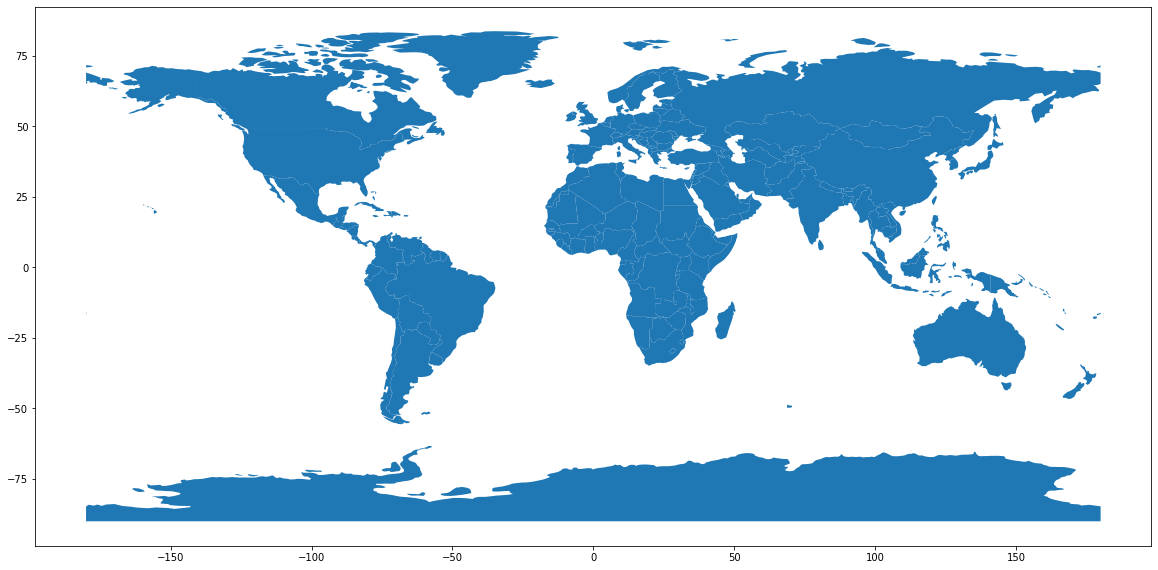

In [69]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


df_world.plot(figsize=(20,30))



In [70]:
period = df[df['Period'] == 2018]
df_world_clean_fuel_and_tech = df_world.merge(period, how="left", left_on=['name'], right_on=['Location'])

In [71]:
df_world_clean_fuel_and_tech.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Location,Indicator,Period,First Tooltip
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,Proportion of population with primary reliance...,2018.0,28.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,Proportion of population with primary reliance...,2018.0,95.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,Proportion of population with primary reliance...,2018.0,95.0
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,Proportion of population with primary reliance...,2018.0,95.0
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,Proportion of population with primary reliance...,2018.0,85.0
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,Proportion of population with primary reliance...,2018.0,8.0
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,Proportion of population with primary reliance...,2018.0,80.0
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,Proportion of population with primary reliance...,2018.0,95.0


In [72]:
df_to_plot = df_world_clean_fuel_and_tech[['geometry', 'First Tooltip']]

Text(0.5, 1, 'Porcentaje de población \n con acceso a combustibles limpios y tecnología en 2018')

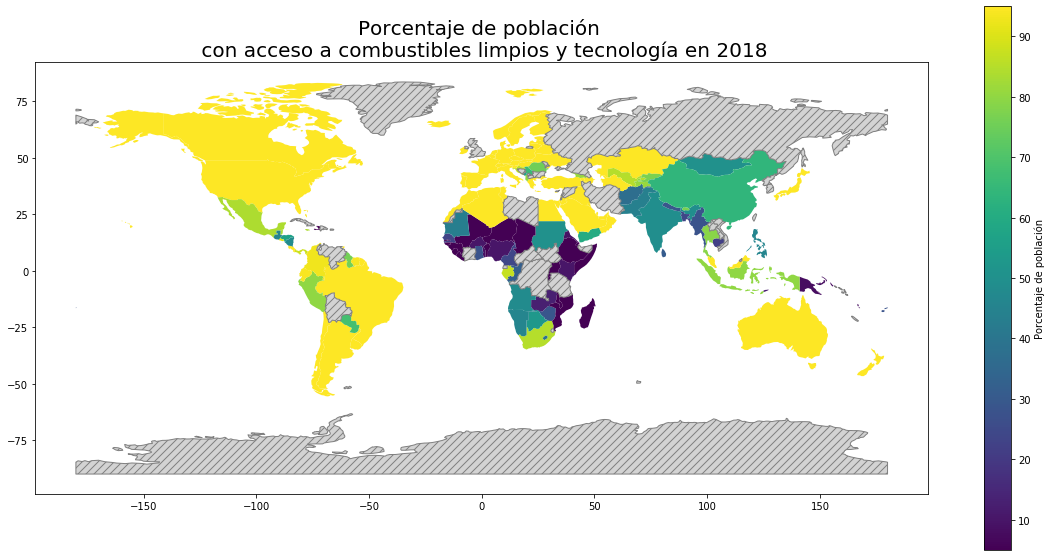

In [85]:
# fig, ax = plt.subplots(1, 1)
fig, ax = plt.subplots(figsize=(20,10))
df_to_plot.plot(column='First Tooltip',
                ax=ax, 
                legend=True, 
                legend_kwds={'label': "Porcentaje de población"},
                missing_kwds={
                   "color": "lightgrey",
                   "edgecolor": "grey",
                   "hatch": "///",
                   "label": "Missing values",
               })
# ax.set(title='Porcentaje de población \n con acceso a combustibles limpios y tecnología en 2018')
ax.set_title('Porcentaje de población \n con acceso a combustibles limpios y tecnología en 2018', size=20)